In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import logging

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction import FeatureHasher
from sklearn.metrics import (
    r2_score,
    mean_squared_error,
    mean_absolute_error,
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score,
    accuracy_score
)

from scipy.sparse import csr_matrix, hstack


logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

# 요구사항

# 1. 모평균과 표본평균에 대한 차이를 설명하고, 독립표본 t 검정을 시행함 (완료)
# 2. 적절한 시각화를 통해 데이터의 분포를 설명함 (완료)
# 3. 다중 선형 회귀 분석을 시행하고 결과를 해석함 (완료)
# 4. 적절한 특성들을 기반으로 로지스틱 회귀 모델을 학습시키고 모델을 평가함 (완료)
# 5. 로지스틱 회귀 모델의 성능을 높이기 위한 시도를 진행함 (완료)

# +결과에 대한 해석 (완료)

In [230]:
!pip install kagglehub

In [231]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("tunguz/online-retail")

print("Path to dataset files:", path)
df = pd.read_csv(path + '/' + os.listdir(path)[0], encoding='latin1')
df.shape

Using Colab cache for faster access to the 'online-retail' dataset.
Path to dataset files: /kaggle/input/online-retail


(541909, 8)

In [232]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [234]:
# 주문 가격 피쳐 생성
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

In [235]:
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

# 'InvoiceDate' 컬럼 이용하여 판매 월 추출
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month

/tmp/ipython-input-3844768752.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [236]:
# 데이터 재확인

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12


## 1. 모집단과 표본 집단의 TotalPrice를 비교해 주세요.

* 데이터셋에서 무작위로 1000개의 표본을 추출하세요.
* 추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차를 비교해주세요.  
* 중심극한정리를 사용해 모집단과 표본의 차이를 설명해주세요.

In [237]:
# ㅡㅡㅡ데이터셋에서 무작위로 1000개의 표본을 추출하세요.

In [238]:
sam_df = df.sample(n=1000)

In [239]:
# ㅡㅡㅡ추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차를 비교해주세요.

In [240]:
print(f"모-평균: {df['TotalPrice'].mean():.2f}\t모-표준편차: {df['TotalPrice'].std():.2f}")
print(f"표본-평균: {sam_df['TotalPrice'].mean():.2f}\t표본-표준편차: {sam_df['TotalPrice'].std():.2f}")

# 모평균은 모집단의 모든 데이터 값으로 평균을 낸 값입니다. (유한 모집단에서)
# 표본평균은 모집단 일부를 추출한 표본의 평균이므로, 둘의 값은 일반적으로 다릅니다.
# 실제로 이 실험에서도 모평균은 17.99 표본평균은 19가 나왔습니다.

# 하지만 표본평균을 이용해 모평균을 추정할 수 있고 이를 통계적 추정이라 합니다.
# 표본평균은 일치 추정량이면서 비편향 추정량이기도 합니다
# 일치 추정량은 표본 크기 n의 값이 커질수록 모수의 값으로 수렴하는 성질이 있습니다.
# 즉, n이 커질수록 표본평균의 값은 모평균에 가까워집니다.
# 비편향 추정량은 표본의 크기와 관계 없이 표본을 무한히 반복해서 뽑았을 때,
# 표본들의 평균(기댓값)이 모수와 일치하는 성질이 있습니다.
# 즉, 같은 크기 n의 표본 추출을 반복해 얻은 표본평균들의 기댓값은 모평균과 일치합니다.
# 이러한 성질들로 표본평균은 모평균을 대표하는 값으로 쓰일 수 있습니다.

# 현실에서는 모평균을 알 수 없기 때문에 두 집단의 모평균을 비교하는 대신
# 각 집단에서 추출한 표본평균을 이용해 가설검정을 진행할 수 있습니다.
# 이때, 표본평균에는 표본오차가 있으므로
# 두 집단의 표본평균 차이를 표준오차로 표준화한 검정통계량 t를 사용합니다.

모-평균: 17.99	모-표준편차: 378.81
표본-평균: 19.00	표본-표준편차: 65.93


In [241]:
# ㅡㅡㅡ중심극한정리를 사용해 모집단과 표본의 차이를 설명해주세요.

In [242]:
# 모집단에서 추출된 '표본의 분포'는 표본의 크기 n이 커질수록 모집단의 분포를 닮아가게 됩니다. (모집단 특성 반영)
# 여기서 '표본의 분포'와 '표본평균의 분포'를 구분해서 이해하는 것이 중요합니다.
# 중심극한정리에 따르면, 표본의 크기 n이 커질수록 '표본평균의 분포'는 모집단 분포와 상관없이 정규분포에 근사하게 됩니다.
# (정규분포로 근사하는 이유는 테일러 급수 등에 의해 참으로 증명되어있음)

# 즉, 표본 크기 n이 커질수록
# 표본의 분포 -> 모집단 분포와 유사해짐
# 표본평균의 분포 -> 정규분포에 근사함 (모집단 분포와 무관)

# 여기서 또 중요한 포인트
# 이론적으로는 표본을 충분한 크기 n으로 무한 반복 추출하여 표본평균을 계속 만들고
# (여기서 '충분한 크기'는 모집단 분포에 따라 달라짐)
# 이렇게 만든 수많은 표본평균들의 분포가 정규분포인지를 관찰해야하지만,
# 현실에서는 표본을 원하는 만큼 계속해서 추출할 수 없습니다.

# 다행히도 중심극한정리는 '정리'이므로, 이미 참으로 증명되어있습니다.
# 표본의 크기 n이 충분히 크다면 내가 지금 뽑은 하나의 표본평균(실현값)은
# 정규분포를 따르는 표본평균의 분포에서 뽑은 값이라고 말할 수 있습니다.

## 2. 주문이 가장 많은 상위 두 국가의 'TotalPrice' 평균에 차이가 있는지 검증하세요.

* 'Country' 변수를 바탕으로 주문이 가장 많은 상위 두 국가를 찾으세요.
* 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증하세요.  
* t-통계량과 p-값을 해석하여 결과를 설명하고, 1종 오류와 2종 오류의 개념을 적용하여 설명해주세요.

In [243]:
# ㅡㅡㅡ'Country' 변수를 바탕으로 주문이 가장 많은 상위 두 국가를 찾으세요.

In [244]:
df['Country'].value_counts().head(2)

,count
Country,
United Kingdom,495478
Germany,9495


In [245]:
# ㅡㅡㅡ독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증하세요.

In [246]:
# 이표본 t검정에 독립표본 t검정(다른 집단)과 대응표본 t검정(같은 집단)이 있다
# 여기서는 다른 집단이므로 독립표본 t검정이다

# 두 국가 tp만 뽑아서 할당
uk_tp = df[df['Country'] == 'United Kingdom']['TotalPrice']
ger_tp = df[df['Country'] == 'Germany']['TotalPrice']

# ttest_ind 반환값 튜플 (t통계량, p값) 언패킹 할당
# 등분산 검정 안했으니까 equal_var=False (웰치 t검정)
t_stat, p_val = stats.ttest_ind(uk_tp, ger_tp, equal_var=False)

print(f"t_stat: {t_stat:.2f}")
print(f"p_val: {p_val:.4f}")
print(f"p_val: {p_val:.4e}")

alpha = 0.05
if p_val < alpha:
    print("p값이 0.05보다 작으므로, 두 국가 간 평균 차이는 통계적으로 유의미하다.")
else:
    print("p값이 0.05보다 크므로, 두 국가 간 평균 차이는 통계적으로 유의미하지 않다.")



t_stat: -10.05
p_val: 0.0000
p_val: 9.8234e-24
p값이 0.05보다 작으므로, 두 국가 간 평균 차이는 통계적으로 유의미하다.


In [247]:
# ㅡㅡㅡt-통계량과 p-값을 해석하여 결과를 설명하고, 1종 오류와 2종 오류의 개념을 적용하여 설명해주세요.

In [248]:
# p값이 유의수준 0.05보다 작으므로, uk_tp 평균과 ger_tp 평균이 같다는 귀무가설을 기각합니다.
# 따라서, uk_tp 와 ger_tp 사이에는 통계적으로 유의미한 차이가 존재한다고 말할 수 있습니다.

# t통계량 -10.05의 해석에서, 마이너스 부호는 uk_tp 평균이 ger_tp 평균보다 작다는 것을 의미합니다.
# 숫자는 표준오차의 단위이므로, 표준오차 10배 정도의 차이는 엄청난 차이라고 할 수 있습니다.

# 1종 오류는 위양성(거짓 양성), 2종 오류는 위음성(거짓 음성)입니다.
# 유의수준 0.05는 귀무가설이 실제로 참일 때, 20번 중 1번 정도는 귀무가설을 잘못 기각하도록 허용함을 의미합니다.
# 귀무가설이 참인데도 잘못 기각하는 경우를 줄이기 위해 유의수준을 더 작게 설정하여 1종 오류 확률을 통제할 수 있습니다.

# 하지만 1종 오류와 2종 오류는 상충관계여서 유의수준을 내려 1종 오류 확률을 낮추면 2종 오류 확률이 올라갑니다
# 이유는 귀무가설을 잘못 기각하는 경우를 줄이기 위해 제한을 강하게 설정하는 경우에
# 대립가설이 참인데도 무시하는 -귀무가설을 기각해야하는데 하지 못하는- 경우가 늘어나기 때문입니다.

# 이때, 1종 오류 확률을 고정한 상태에서 2종 오류 확률을 낮추기 위해
# 표본 크기 n과 효과 크기 d를 조정하는 실험 설계를 고려할 수 있습니다.
# 하지만 이 실험은 비교하려는 대상과 표본 크기가 이미 정해져있으므로
# n과 d는 조절할 수 없는 고정된 상수였습니다.

## 3. 주중, 주말에 따라서 발생하는 UnitPrice의 분포가 달라지는지 확인하세요.

* 주중의 'UnitPrice'와 주말의 'UnitPrice'의 분포를 분석하기 위해 데이터의 중심경향치(평균, 중간값), 변산성(표준편차, 분산), 분위수를 계산하세요.  
* 상자수염그림과 히스토그램을 그려 시각화를 통해 분포를 확인하고 데이터의 분포에 대해 설명해주세요.

In [249]:
# ㅡㅡㅡ주중의 'UnitPrice'와 주말의 'UnitPrice'의 분포를 분석하기 위해 데이터의 중심경향치(평균, 중간값), 변산성(표준편차, 분산), 분위수를 계산하세요.

In [250]:
# 주중 주말 나눠서 up 할당
wday_up = df[df['DayOfWeek'] < 5]['UnitPrice']
wend_up = df[df['DayOfWeek'] >= 5]['UnitPrice']

In [251]:
# ㅡㅡㅡ상자수염그림과 히스토그램을 그려 시각화를 통해 분포를 확인하고 데이터의 분포에 대해 설명해주세요.

<Axes: ylabel='UnitPrice'>

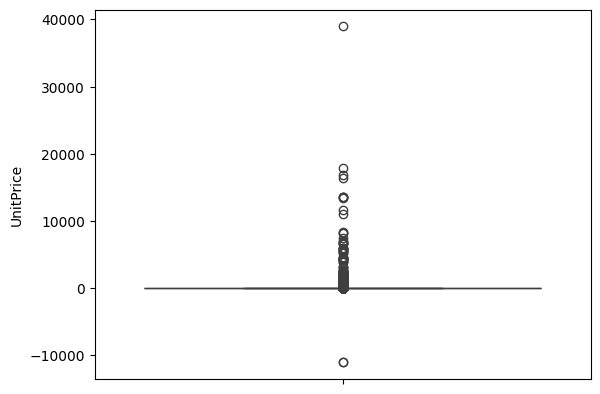

In [252]:
sns.boxplot(wday_up)

<Axes: xlabel='UnitPrice', ylabel='Count'>

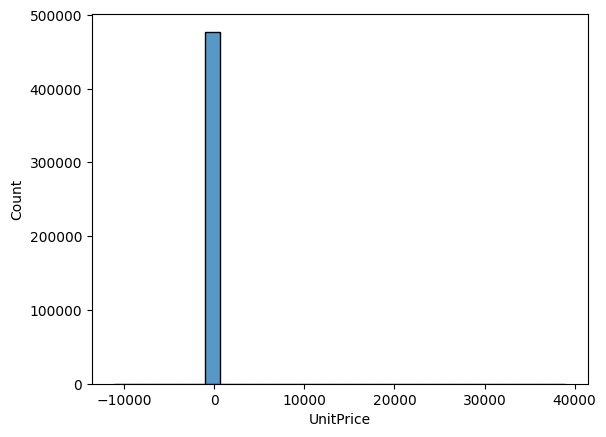

In [253]:
sns.histplot(wday_up, bins=30)

<Axes: ylabel='UnitPrice'>

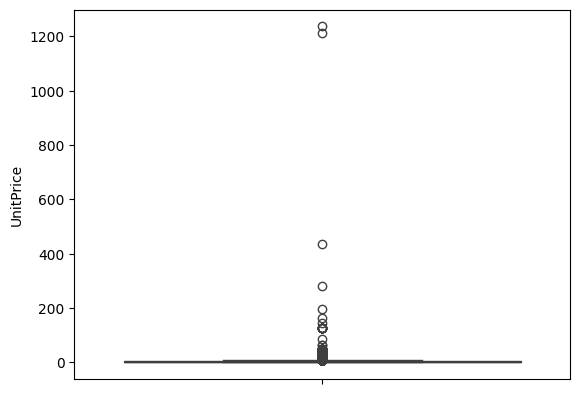

In [254]:
sns.boxplot(wend_up)

<Axes: xlabel='UnitPrice', ylabel='Count'>

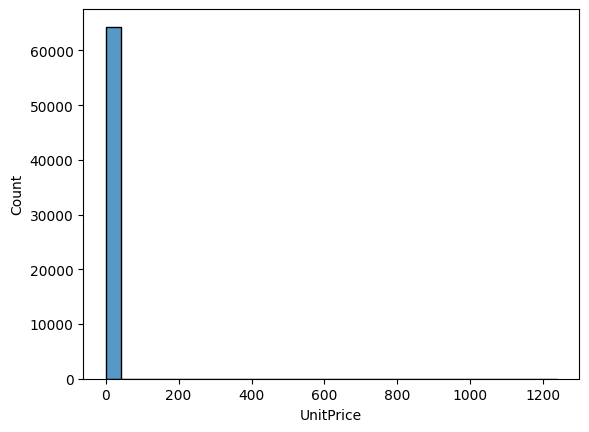

In [255]:
sns.histplot(wend_up, bins=30)

In [256]:
print(wday_up.skew())
print(wend_up.skew())

175.28765250490636
116.62719272024584


In [257]:
# 박스플랏과 히스토그램을 확인해보니 주중/주말 모두 분포가 심각하게 편중되어 있습니다.
# 특히 0 근처의 작은 값들에 대부분의 데이터가 몰려있음을 확인할 수 있으며
# 값이 극단적으로 높거나 낮은 이상치도 발견되고 있습니다.
# 박스 내부는 보이지 않고 히스토그램 막대는 1개라 더 자세한 해석이 불가능

# 스큐니스 메서드 확인 결과, 아주 극단적인 양의 왜도 나타남
# 로그를 씌워서 분포 재확인 (로그값 컬럼은 필요시 정의)

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: ylabel='UnitPrice'>

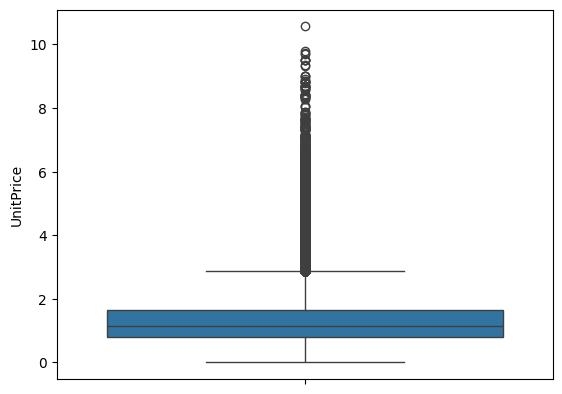

In [258]:
sns.boxplot(np.log1p(wday_up))

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='UnitPrice', ylabel='Count'>

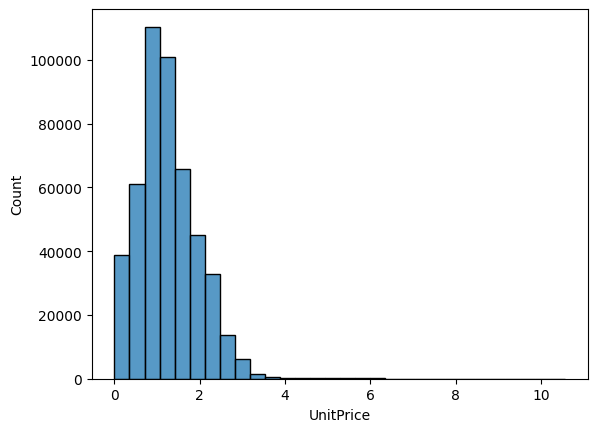

In [259]:
sns.histplot(np.log1p(wday_up), bins=30)

<Axes: ylabel='UnitPrice'>

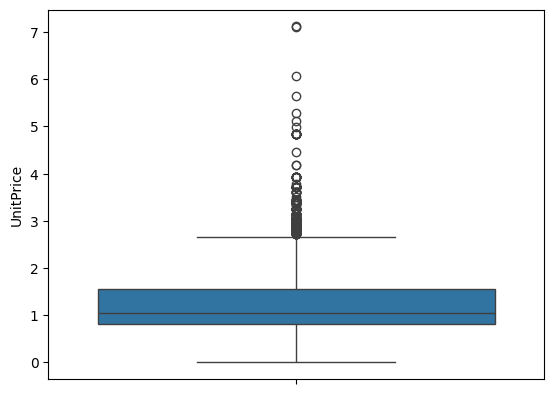

In [260]:
sns.boxplot(np.log1p(wend_up))

<Axes: xlabel='UnitPrice', ylabel='Count'>

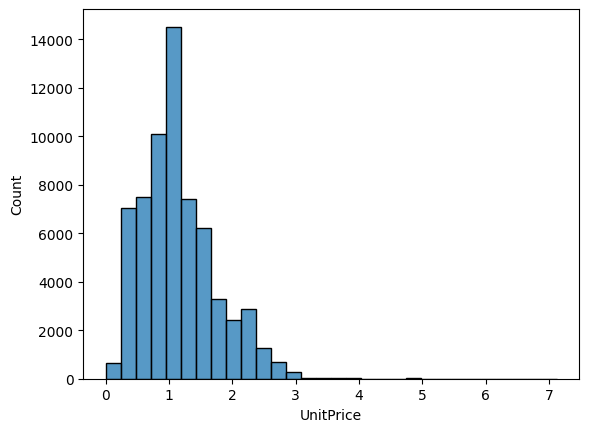

In [261]:
sns.histplot(np.log1p(wend_up), bins=30)

In [262]:
# 로그를 씌우니 박스 내부가 잘 보임
# 히스토그램이 해석에 용이한 종 모양에 가깝게 변경됨

# 어떤 로그 스케일 값에 얼만큼의 데이터가 있는지 식별 가능하며
# 해당 로그 스케일 값을 역산하면 원래의 가격도 알 수 있음

# 로그로 변환해도 여전히 박스 수염 밖의 이상치들이 많이 보임
# 어떻게 생성된 이상치인지 조사하고 처리 방법 결정할 것.


## 4. 상품의 단가와 판매 국가, 판매 날짜을 이용해 판매 수량을 예측하는 회귀 모델을 만드세요.
* 필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.  
* 변수를 다음과 같이 설정하여 다중 선형 회귀 분석을 진행하세요.
    * 종속변수: 판매 수량(`Quantity`)
    * 독립변수: 상품 단가(`UnitPrice`), 판매 국가(`Country`), 판매 요일(`DayOfWeek`), 판매 월( `InvoiceMonth`)   
* 회귀계수와 결정계수를 활용하여 회귀 분석 결과를 해석해주세요.

In [263]:
# ㅡㅡㅡ필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.

In [264]:
# 원본 데이터 중복 정리
print(df.duplicated().sum())
df1 = df.drop_duplicates().copy()
print(df1.duplicated().sum())

5268
0


In [265]:
# 결측치 확인

df1.isna().sum()

# 설명 변수 UnitPrice, Country, DayOfWeek, InvoiceMonth
# 반응 변수 Quantity

# 내가 쓰려는 컬럼에는 결측치가 없어서 처리할 것이 없다.

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135037
Country,0
TotalPrice,0
DayOfWeek,0


In [266]:
# UnitPrice 처리 계획
# 명백한 이상치 제거 (음수값)
# 양의 왜도가 너무 심해서 로그 씌운 컬럼 만들 생각
# 로그 씌워도 이상치인 것들 확인 후 처리법 결정

# 음수값 확인 및 제거 (근데 0 도 이번 회귀분석에 필요 없다고 생각해서 같이 제거)
df1[df1['UnitPrice'] <= 0]
df2 = df1[df1['UnitPrice'] > 0].copy()

# 로그 씌운 컬럼 선언
df2['UnitPrice_log'] = np.log1p(df2['UnitPrice'])

df2.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,InvoiceMonth,UnitPrice_log
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2,12,1.266948
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12,1.479329
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2,12,1.321756
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12,1.479329
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12,1.479329


<Axes: ylabel='UnitPrice_log'>

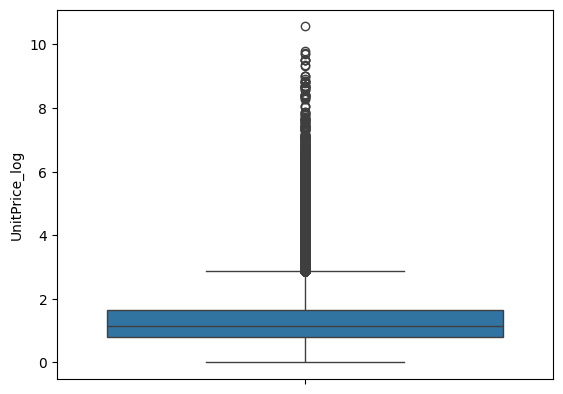

In [267]:
sns.boxplot(df2['UnitPrice_log'])

<Axes: xlabel='UnitPrice_log', ylabel='Count'>

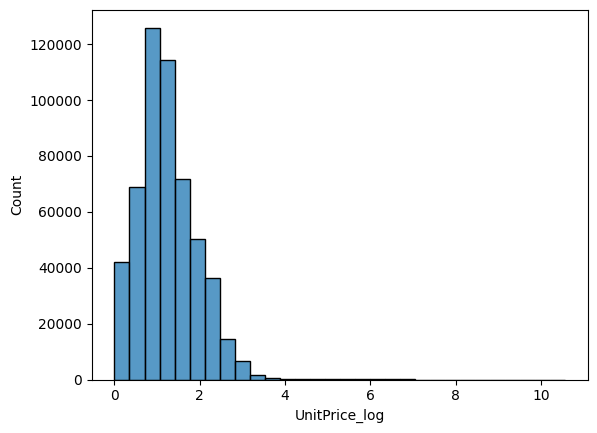

In [268]:
sns.histplot(df2['UnitPrice_log'], bins=30)

In [269]:
# 박스 수염 윗쪽을 벗어난 데이터의 비중을 확인

# IQR 만들기
Q1 = df2['UnitPrice_log'].quantile(0.25)
Q3 = df2['UnitPrice_log'].quantile(0.75)
IQR = Q3 - Q1
upper_fence = Q3 + 1.5 * IQR # 윗쪽만 확인

# 확인용 변수들 선언
outlier_count = len(df2[df2['UnitPrice_log'] > upper_fence])
total_count = len(df2)
ratio = (outlier_count / total_count) * 100

print(f"전체 데이터 개수: {total_count}")
print(f"이상치 기준값(로그): {upper_fence:.2f}")
print(f"이상치 개수: {outlier_count}")
print(f"이상치 비율: {ratio:.2f}%")


전체 데이터 개수: 534129
이상치 기준값(로그): 2.87
이상치 개수: 7085
이상치 비율: 1.33%


In [270]:
# 이상치 처리 방법 고민

# 히스토그램 기준으로 4 이상을 처리할까?
# 박스 수염 윗쪽을 처리할까?
# 상위 1%를 처리할까?

# 처리할 떄는 삭제할까 대체(클리핑)할까?

In [271]:
# 박스 수염 윗쪽 1.33%를 삭제하기로 결정
# 데이터 행이 50만이 넘고 로그를 씌워도 이상치면 너무 심하다고 생각.

df3 = df2[df2['UnitPrice_log'] <= upper_fence].copy()

<Axes: ylabel='UnitPrice_log'>

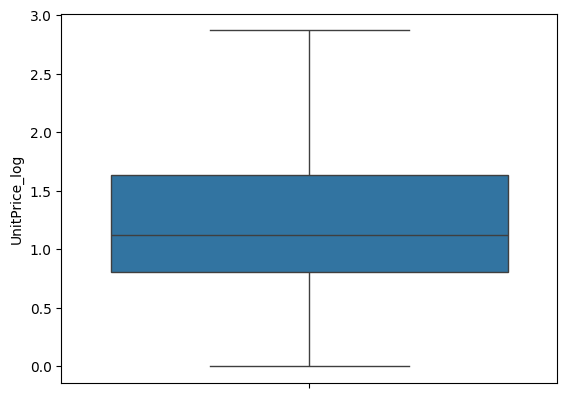

In [272]:
sns.boxplot(df3['UnitPrice_log'])

# 확인해보니 잘 삭제됨

In [273]:
# ㅡㅡㅡ변수를 다음과 같이 설정하여 다중 선형 회귀 분석을 진행하세요.
# ㅡㅡㅡ종속변수: 판매 수량(Quantity)
# ㅡㅡㅡ독립변수: 상품 단가(UnitPrice), 판매 국가(Country), 판매 요일(DayOfWeek), 판매 월( InvoiceMonth)

In [274]:
df3.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,InvoiceMonth,UnitPrice_log
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2,12,1.266948
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12,1.479329
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2,12,1.321756
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12,1.479329
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12,1.479329


In [275]:
df3[['UnitPrice', 'Country', 'DayOfWeek', 'InvoiceMonth', 'Quantity']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 527044 entries, 0 to 541908
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   UnitPrice     527044 non-null  float64
 1   Country       527044 non-null  object 
 2   DayOfWeek     527044 non-null  int32  
 3   InvoiceMonth  527044 non-null  int32  
 4   Quantity      527044 non-null  int64  
dtypes: float64(1), int32(2), int64(1), object(1)
memory usage: 20.1+ MB


In [276]:
# .info() 확인해보니 Country 이것만 object 이다.(사용할 컬럼 중에서)
# 값의 종류가 몇개인지 확인하고 처리방법 결정할 계획.

# 값의 종류 확인
print(df3['Country'].nunique()) # 결과값 38
print(df3['Country'].str.lower().nunique()) # 결과값 38
# .srt.lower()로 같은 의미인데 대소문자만 다른 경우가 있는지도 꼼꼼히 확인한다

# 컬럼 내용물에 이상이 있는지도 눈으로 직접 확인해본다
print(df3['Country'].unique())

# 전부 문제 없음
# 100개 미만이므로 원핫인코딩 진행할 생각.

38
38
['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']


In [277]:
# 독립변수 종속변수 나누기

# X = df3[['UnitPrice', 'Country', 'DayOfWeek', 'InvoiceMonth']] # UnitPrice 사용
X = df3[['UnitPrice_log', 'Country', 'DayOfWeek', 'InvoiceMonth']] # UnitPrice_log 사용
y = df3['Quantity']



# 전처리 파이프라인 정의

# make_column_transformer 여러 컬럼 전처리 한번에 해주는 함수
# 매개변수 1. 변환규칙 튜플 (변환기, 컬럼)
# 매개변수 2. 나머지 처리방법
transformer = make_column_transformer(
                                      (OneHotEncoder(handle_unknown='ignore'), ['Country']), # 계획대로 Country 원핫인코딩
                                      remainder='passthrough' # 나머지는 수치형이니까 그대로 둔다
                                      )


# 모델 파이프라인 생성

# make_pipeline 전처리 규칙과 학습 모델을 하나로 묶어줌
# 위에서 만든 규칙인 transformer 와 선형회귀모델을 묶어줬다
model = make_pipeline(transformer, LinearRegression())


# 학습 데이터, 테스트 데이터 분리 (X y 각각 train, test 나누기)
# random_state=42 재현성을 위해 추가. 숫자 42는 그냥 밈임
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 모델 학습 (fit 한 번으로 전처리까지 자동 수행됨)
model.fit(X_train, y_train)


# 학습된 모델로 예측하기
y_pred = model.predict(X_test)

In [278]:
# ㅡㅡㅡ회귀계수와 결정계수를 활용하여 회귀 분석 결과를 해석해주세요.

In [279]:
# 결정계수 성능 평가 (여기는 LLM으로 작성)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

n = len(y_test)
p = X_test.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"R2 Score (결정계수): {r2:.4f}")
print(f"Adj R2 (수정 결정계수): {adj_r2:.4f}")
print(f"MAE (평균 절대 오차): {mae:.2f}")
print(f"MSE (평균 제곱 오차): {mse:.2f}")
print(f"RMSE (루트 제곱 오차): {rmse:.2f}")

R2 Score (결정계수): 0.0013
Adj R2 (수정 결정계수): 0.0013
MAE (평균 절대 오차): 10.47
MSE (평균 제곱 오차): 54472.35
RMSE (루트 제곱 오차): 233.39


In [ ]:
# 결정계수가 1에 가까울 수록 좋다
# 현재는 결정계수가 0에 가깝다
# 모델 성능이 아주 구데기임

In [280]:
# 회귀계수 결과 해석 (여기는 LLM으로 작성)
preprocessor = model.steps[0][1]
regressor = model.steps[1][1]

feature_names = preprocessor.get_feature_names_out()

coefficients = regressor.coef_
intercept = regressor.intercept_

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

coef_df['Feature'] = coef_df['Feature'].str.replace('onehotencoder__', '').str.replace('remainder__', '')

coef_df['Abs_Coef'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coef', ascending=False)

print("[회귀 분석 결과 해석]\n")
print(f"1. 기본 판매량 (절편, Intercept): {intercept:.2f} 개")
print("   -> 모든 변수가 0(또는 기준점)일 때 예상되는 기본 판매량입니다.")

print("\n2. 판매량에 영향을 많이 주는 변수 TOP 10:")
display(coef_df[['Feature', 'Coefficient']].head(10))

top_feat = coef_df.iloc[0]['Feature']
top_val = coef_df.iloc[0]['Coefficient']
effect = "증가" if top_val > 0 else "감소"

print(f"[Key Insight]: '{top_feat}' 변수가 판매량에 가장 큰 영향을 미칩니다.")
print(f"   -> 이 조건에 해당하면 판매량이 약 {abs(top_val):.2f} 개 {effect}하는 경향이 있습니다.")

[회귀 분석 결과 해석]

1. 기본 판매량 (절편, Intercept): 31.49 개
   -> 모든 변수가 0(또는 기준점)일 때 예상되는 기본 판매량입니다.

2. 판매량에 영향을 많이 주는 변수 TOP 10:


,Feature,Coefficient
24,Country_Netherlands,63.181565
32,Country_Sweden,59.291670
20,Country_Japan,50.801755
0,Country_Australia,46.678255
34,Country_USA,-18.219237
37,Country_Unspecified,-13.381001
23,Country_Malta,-12.183291
36,Country_United Kingdom,-11.346866
27,Country_Portugal,-10.187478
15,Country_Greece,-9.538671


[Key Insight]: 'Country_Netherlands' 변수가 판매량에 가장 큰 영향을 미칩니다.
   -> 이 조건에 해당하면 판매량이 약 63.18 개 증가하는 경향이 있습니다.


In [ ]:
# 절편 31.49개는 모든 설명변수가 0일 때의 예측 판매량이다.
# 즉, 원핫인코딩에서 제외된 기준국가일 때의 예측 판매량이다.
# Coefficient의 값들은 다른 조건이 동일할 때, 기준국가보다 더/덜 팔렸음을 의미한다.
# 네덜란드, 스웨덴, 일본, 호주는 기준국가 대비 예측 판매량이 크게 증가함을 관찰할 수 있다.

## 5. 상품 정보와 거래 정보를 바탕으로 해당 거래가 반품될 가능성을 예측하는 로지스틱 회귀 모델을 만드세요.
* 필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.  
* `Quantity` 피쳐를 활용해 `IsReturn` 피쳐를 생성하세요.
* 모델 학습에 사용할 적절한 피쳐를 선정하세요.
* 모델 학습과 검증을 위해 데이터셋을 train셋과 test셋으로 나누세요.
* `IsReturn`을 예측하는 로지스틱 회귀 모델을 학습하세요.
* 혼동행렬, 정밀도, 재현율, F1-score 등 다양한 평가지표를 사용하여 모델의 성능을 평가하세요.
* 모델의 성능을 더 높일 수 있는 방안에 대해서 고민해보세요.

In [281]:
# ㅡㅡㅡ필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.

In [282]:
df1.head()

# 아까 원본 데이터에서 중복행만 제거한 df1 사용

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12


In [283]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     536641 non-null  object        
 1   StockCode     536641 non-null  object        
 2   Description   535187 non-null  object        
 3   Quantity      536641 non-null  int64         
 4   InvoiceDate   536641 non-null  datetime64[ns]
 5   UnitPrice     536641 non-null  float64       
 6   CustomerID    401604 non-null  float64       
 7   Country       536641 non-null  object        
 8   TotalPrice    536641 non-null  float64       
 9   DayOfWeek     536641 non-null  int32         
 10  InvoiceMonth  536641 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(2), int64(1), object(4)
memory usage: 45.0+ MB


In [284]:
df1.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice,DayOfWeek,InvoiceMonth
count,536641.000000,536641,536641.000000,401604.000000,536641.000000,536641.000000,536641.000000
mean,9.620029,2011-07-04 08:57:06.087421952,4.632656,15281.160818,18.123861,2.423889,7.544820
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,-168469.600000,0.000000,1.000000
25%,1.000000,2011-03-28 10:52:00,1.250000,13939.000000,3.750000,1.000000,5.000000
50%,3.000000,2011-07-19 14:04:00,2.080000,15145.000000,9.870000,2.000000,8.000000
75%,10.000000,2011-10-18 17:05:00,4.130000,16784.000000,17.400000,4.000000,11.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,168469.600000,6.000000,12.000000
std,219.130156,NaN,97.233118,1714.006089,380.656263,1.839870,3.508696


In [285]:
# 결측치 확인

df1.isna().sum().sort_values()

,0
InvoiceNo,0
StockCode,0
Quantity,0
InvoiceDate,0
Country,0
UnitPrice,0
DayOfWeek,0
TotalPrice,0
InvoiceMonth,0
Description,1454


In [286]:
((df1.isna().sum() / len(df1)) * 100).sort_values()

,0
InvoiceNo,0.000000
StockCode,0.000000
Quantity,0.000000
InvoiceDate,0.000000
Country,0.000000
UnitPrice,0.000000
DayOfWeek,0.000000
TotalPrice,0.000000
InvoiceMonth,0.000000
Description,0.270945


In [287]:
df1[df1['CustomerID'].isna()].tail(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,InvoiceMonth
541531,581498,84997d,CHILDRENS CUTLERY POLKADOT PINK,1,2011-12-09 10:26:00,8.29,NaN,United Kingdom,8.29,4,12
541532,581498,85038,6 CHOCOLATE LOVE HEART T-LIGHTS,1,2011-12-09 10:26:00,4.13,NaN,United Kingdom,4.13,4,12
541533,581498,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,1,2011-12-09 10:26:00,16.63,NaN,United Kingdom,16.63,4,12
541534,581498,85049a,TRADITIONAL CHRISTMAS RIBBONS,5,2011-12-09 10:26:00,3.29,NaN,United Kingdom,16.45,4,12
541535,581498,85049e,SCANDINAVIAN REDS RIBBONS,4,2011-12-09 10:26:00,3.29,NaN,United Kingdom,13.16,4,12
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom,20.65,4,12
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom,16.52,4,12
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom,4.96,4,12
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom,10.79,4,12
541540,581498,DOT,DOTCOM POSTAGE,1,2011-12-09 10:26:00,1714.17,NaN,United Kingdom,1714.17,4,12


In [288]:
# CustomerID 결측비율이 25%나 돼서 확인해보니 행에 이상 없어보임
# 아무래도 비회원 구매 이런 내용인 것 같음
# 처리 방법을 고민해야함. 채워서 쓸까 컬럼을 삭제할까

# 비회원 구매도 의미가 있을 것 같음. 채워서 사용하려는데
# 지금 CustomerID 자료형이 플로트라고 나도 비회원을 0으로 채워버리면
# 모델이 회원id를 숫자로 인식하니까, 숫자 차이에 의미를 부여할 것 같다.
# 그럼 문제니까 범주형으로 처리할까?

In [289]:
df1['CustomerID'].value_counts() # 값 종류 4372개

# 이걸 원핫인코딩으로 처리하면 차원 폭발임

,count
CustomerID,
17841.0,7812
14911.0,5898
14096.0,5128
12748.0,4459
14606.0,2759
...,...
17715.0,1
14705.0,1
13120.0,1


<Axes: xlabel='CustomerID', ylabel='Count'>

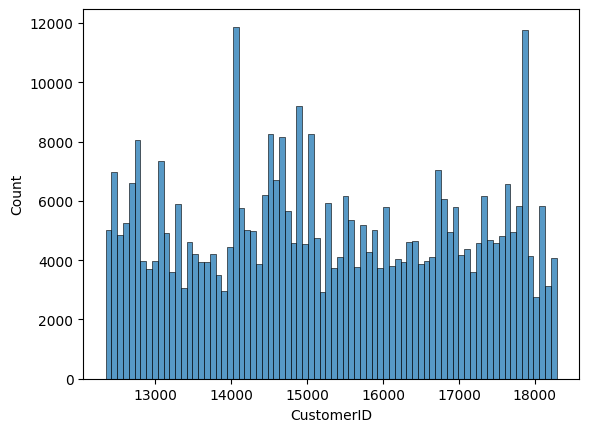

In [290]:
sns.histplot(df1['CustomerID'])

In [291]:
# 골고루 분포한 편이라 (고빈도는 그대로 + 나머지 묶음) 이런 조합도 안될 것 같음

In [292]:
# 회원/비회원 이진 피처로 만들어야겠음.

# 이 문제에서 사용할 df 새로 선언
df4 = df1.copy()

# IsMember 컬럼. 회원이면 1, 비회원이면 0
df4["IsMember"] = df4["CustomerID"].notna().astype(int)

df4.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,InvoiceMonth,IsMember
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2,12,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2,12,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12,1


In [293]:
# Description 컬럼은 사용하지 않을 거라서 결측치 처리를 하지 않음.

# 사용하지 않을 컬럼
# Description 중복 정보 (StockCode)
# InvoiceDate 중복 정보 (DayOfWeek, InvoiceMonth)
# TotalPrice 중복 정보 (UnitPrice, Quantity)

# 확인할 컬럼
# InvoiceNo

In [294]:
df4[df4["InvoiceNo"].str.contains("C")].head(10)

# InvoiceNo 값이 C로 시작하면 Quantity 값이 음수인 것 같음

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,InvoiceMonth,IsMember
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50,2,12,1
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65,2,12,1
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80,2,12,1
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,2,12,1
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,2,12,1
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,2,12,1
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.0,United Kingdom,-41.40,2,12,1
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80,2,12,1
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-39.60,2,12,1
939,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897.0,United Kingdom,-25.50,2,12,1


In [295]:
df4["InvoiceNo"].str.contains("C").sum() # 값 9251

np.int64(9251)

In [296]:
(df4["Quantity"] < 0).sum() # 값 10587

np.int64(10587)

In [297]:
# 이상하네 같아야하는데 왜 음수인 행이 더 많지?

In [298]:
# InvoiceNo에 C가 없으면서 음수인 행 출력
mask_C = df4["InvoiceNo"].str.contains("C")
mask_mQ = df4["Quantity"] < 0

df4[(~mask_C) & mask_mQ] # 행 1336개

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,InvoiceMonth,IsMember
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom,-0.0,2,12,0
4347,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.0,NaN,United Kingdom,-0.0,3,12,0
7188,536996,22712,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom,-0.0,4,12,0
7189,536997,22028,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom,-0.0,4,12,0
7190,536998,85067,NaN,-6,2010-12-03 15:30:00,0.0,NaN,United Kingdom,-0.0,4,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,2011-12-07 18:36:00,0.0,NaN,United Kingdom,-0.0,2,12,0
535335,581212,22578,lost,-1050,2011-12-07 18:38:00,0.0,NaN,United Kingdom,-0.0,2,12,0
535336,581213,22576,check,-30,2011-12-07 18:38:00,0.0,NaN,United Kingdom,-0.0,2,12,0
536908,581226,23090,missing,-338,2011-12-08 09:56:00,0.0,NaN,United Kingdom,-0.0,3,12,0


In [299]:
# 출력해보니 UnitPrice 값이 0인 것이 수상함.

# 0인 행 숫자 확인
(df4['UnitPrice'] == 0).sum() # 값 2510

# 0인 행 숫자는 2510이니까 1336보다 크긴 하네

np.int64(2510)

In [300]:
# 확인용 불리언 마스크 선언
mask_up0 = (df4['UnitPrice'] == 0)

In [301]:
# C포함하지 않으면서 & Quantity 음수이면서 & UnitPrice 0이 아닌 행 출력해봐
df4[(~mask_C) & mask_mQ & (~mask_up0)] # 행 0개

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,InvoiceMonth,IsMember


In [302]:
# 역시 하나도 출력 안되네
# 아하 C가 없으면서 Quantity가 음수인 행은 오류인 것 같음

# 근데 C가 없으면서 Quantity 음수인 행을 전부 지워도
# 아직 UnitPrice 0인 행들이 2510 - 1336 = 1174 개 남음
# UnitPrice 0인 행들이 문제가 있는 것 같음. 삭제해야겠음
df5 = df4[df4['UnitPrice'] > 0]

# InvoiceNo도 나중에 지워야겠음. 왜냐면 'C'로 반품이라는 타깃 정보를 담고 있어서.
# 목표는 로지스틱 회귀로 반품을 분류하는 것임 (Quantity 음수값)


In [303]:
# UnitPrice 로그 컬럼 선언 및 이상치 제거
# 아까 사용한 코드를 갖고와서 쓴다.

df5['UnitPrice_log'] = np.log1p(df5['UnitPrice'])

Q1 = df5['UnitPrice_log'].quantile(0.25)
Q3 = df5['UnitPrice_log'].quantile(0.75)
IQR = Q3 - Q1
upper_fence = Q3 + 1.5 * IQR

df6 = df5[df5['UnitPrice_log'] <= upper_fence].copy()


/tmp/ipython-input-4226946080.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['UnitPrice_log'] = np.log1p(df5['UnitPrice'])


In [304]:
# Country 컬럼은 38개 아까 확인했으니까 원핫인코딩 진행할 계획

In [305]:
# StockCode 확인

df6["StockCode"].value_counts() # 값 종류 3897개

# 너무 많아서 이대로는 원핫인코딩 못함
# 100개 미만으로 줄이고 싶음

,count
StockCode,
85123A,2295
85099B,2153
22423,1940
47566,1719
20725,1626
...,...
85034b,1
84971l,1
72802c,1


In [306]:
# 빈도 통계 확인
vc = df6["StockCode"].value_counts()

vc.describe()

# 평균값(135)이 중앙값(65)보다 훨씬 크고
# 최소값은 1, 최대값은 2295
# 표준편차는 198
# 소수의 범주가 대부분을 차지하고
# 나머지는 조금씩만 나오는 구조가 아닐까?

,count
count,3897.000000
mean,135.243521
std,198.415921
min,1.000000
25%,16.000000
50%,65.000000
75%,169.000000
max,2295.000000


In [307]:
(vc <= 1).mean(), (vc <= 5).mean(), (vc <= 20).mean()

# 1번 이하 나온 범주의 비율 5%
# 5번 이하 나온 범주의 비율 15%
# 20번 이하 나온 범주의 비율 30%

(np.float64(0.04157043879907621),
 np.float64(0.1321529381575571),
 np.float64(0.28303823453938926))

In [308]:
def cover(vc, N):
    return vc.head(N).sum() / vc.sum()

cover(vc, 100), cover(vc, 300), cover(vc, 500), cover(vc, 1000)

# 상위 100개 범주가 차지하는 비율 18%
# 상위 300개 범주가 차지하는 비율 38%
# 상위 500개 범주가 차지하는 비율 51%
# 상위 1,000개 범주가 차지하는 비율 71%

(np.float64(0.1899841379467369),
 np.float64(0.38280105645828433),
 np.float64(0.5134125424063266),
 np.float64(0.7231407624410865))

<Axes: xlabel='count', ylabel='Count'>

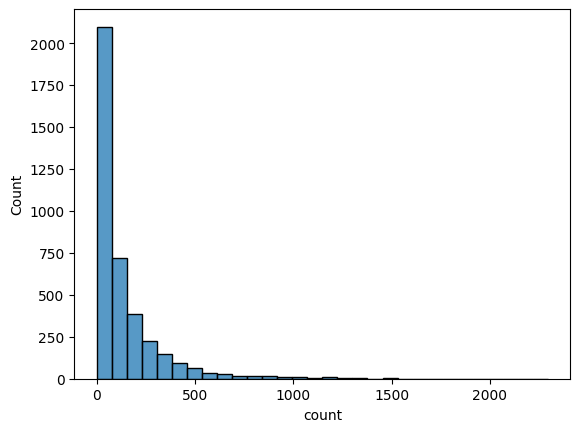

In [309]:
sns.histplot(vc, bins=30)

# 마지막으로 히스토그램을 확인해봐도 몰려있는 것이 맞기는 하다

In [310]:
# 이런 관찰을 하고나서, 고빈도 범준느 그대로 두고 나머지는 others로 묶어야겠다는 생각을 했다
# 그러니까 상위 N개(Top-N)를 그대로 두고 나머지를 others로 묶자는 아이디어다
# 결과적으로 100개 미만의 범주가 되도록 만들고 싶었다.

# 근데 데이터 빈도 비율이 애매해서 100개 미만이 되도록 만들면 others가 심하게 뭉개진다
# 위에 계산을 보면 상위 100개가 차지하는 비율이 18%다
# others로 82%를 집어넣으면 잃는 정보가 너무 많다.

# 다른 방법으로 생각한 원핫인코딩 + min_frequency도 문제가 있었다
# 희귀 범주를 처리하려고 min_frequency 수치를 작게 잡으면 묶이지 않고 남는 범주들이 많아진다.
# 이러면 총 범주 숫자가 100개를 훌쩍 넘어버린다.(위 계산에 의하면 상위 1,000개를 그대로 남겨야 71%를 커버함)

# 그래서 다른 방법을 생각했는데 상위 범주 80개 정도를 그대로 두고, 나머지를 20개 구간으로 쪼개서 새로운 범주로 만드는 것이다.
# 근데 너무 불편하고 20개 구간을 쪼개는 기준도 여러가지가 있어서 과연 무엇이 효과적인가 끝없는 의문이 들었다.

# 계속 고민하다가 타깃 인코딩, 피처 해싱이라는 대안을 찾았다
# 피처 해싱은 고차원 범주형 변수를 해시 함수로 고정된 차원의 숫자 벡터로 변환하는 기법이다
# 이후 피처 해싱으로 진행할 계획


In [311]:
# ㅡㅡㅡQuantity 피쳐를 활용해 IsReturn 피쳐를 생성하세요.

In [312]:
# 이진 피처 IsReturn 만들기
df6['IsReturn'] = (df6['Quantity'] < 0).astype(int)

df6.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,InvoiceMonth,IsMember,UnitPrice_log,IsReturn
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2,12,1,1.266948,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12,1,1.479329,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2,12,1,1.321756,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12,1,1.479329,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2,12,1,1.479329,0


In [313]:
# 아까 지우기로 한 컬럼들 + InvoiceNo, CustomerID, UnitPrice, Quantity
drop_cols = ['Description', 'InvoiceDate', 'TotalPrice', 'InvoiceNo', 'CustomerID', 'UnitPrice', 'Quantity']
df7 = df6.drop(columns=drop_cols).copy()

df7.head()

,StockCode,Country,DayOfWeek,InvoiceMonth,IsMember,UnitPrice_log,IsReturn
0,85123A,United Kingdom,2,12,1,1.266948,0
1,71053,United Kingdom,2,12,1,1.479329,0
2,84406B,United Kingdom,2,12,1,1.321756,0
3,84029G,United Kingdom,2,12,1,1.479329,0
4,84029E,United Kingdom,2,12,1,1.479329,0


In [314]:
df7.info()

# 컬럼 처리 계획
# StockCode 피처 해싱
# Country, DayOfWeek, InvoiceMonth 원핫인코딩
# DayOfWeek와 InvoiceMonth는 수치형인데도 원핫인코딩 하는 이유는, 숫자에 위계가 없기 때문에 범주형으로 판단함
# IsMember는 이진이므로 그대로 넣을 예정
# UnitPrice_log 수치형 그대로 넣기
# IsReturn 타깃 변수

<class 'pandas.core.frame.DataFrame'>
Index: 527044 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   StockCode      527044 non-null  object 
 1   Country        527044 non-null  object 
 2   DayOfWeek      527044 non-null  int32  
 3   InvoiceMonth   527044 non-null  int32  
 4   IsMember       527044 non-null  int64  
 5   UnitPrice_log  527044 non-null  float64
 6   IsReturn       527044 non-null  int64  
dtypes: float64(1), int32(2), int64(2), object(2)
memory usage: 28.1+ MB


In [315]:
# ㅡㅡㅡ모델 학습에 사용할 적절한 피쳐를 선정하세요.

In [316]:
target_col = "IsReturn"

hash_cols = ["StockCode"]
ohe_cols  = ["Country", "DayOfWeek", "InvoiceMonth"]
num_cols  = ["UnitPrice_log", "IsMember"]

X = df7[hash_cols + ohe_cols + num_cols].copy()
y = df7[target_col].astype(int).values

In [317]:
# ㅡㅡㅡ모델 학습과 검증을 위해 데이터셋을 train셋과 test셋으로 나누세요.

In [318]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train positive rate (IsReturn=1):", y_train.mean())


# StockCode 해싱
n_hash = 64
hasher = FeatureHasher(n_features=n_hash, input_type="string", alternate_sign=False)

train_tokens = [[f"StockCode={v}"] for v in X_train["StockCode"].astype(str)]
test_tokens  = [[f"StockCode={v}"] for v in X_test["StockCode"].astype(str)]

X_train_hash = hasher.transform(train_tokens)
X_test_hash  = hasher.transform(test_tokens)

# Country, DayOfWeek, InvoiceMonth 원핫
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=True)
X_train_ohe = ohe.fit_transform(X_train[ohe_cols].astype(str))
X_test_ohe  = ohe.transform(X_test[ohe_cols].astype(str))

# 수치형
X_train_num = csr_matrix(X_train[num_cols].values)
X_test_num  = csr_matrix(X_test[num_cols].values)

# 결합
X_train_final = hstack([X_train_num, X_train_ohe, X_train_hash], format="csr")
X_test_final  = hstack([X_test_num,  X_test_ohe,  X_test_hash], format="csr")

print("최종 피처 차원:", X_train_final.shape[1])

Train positive rate (IsReturn=1): 0.0165522311952281
최종 피처 차원: 122


In [319]:
# ㅡㅡㅡIsReturn을 예측하는 로지스틱 회귀 모델을 학습하세요.

In [320]:
clf = LogisticRegression(
    solver="liblinear",
    class_weight="balanced",
    C=0.3,
    max_iter=5000
)
clf.fit(X_train_final, y_train)

LogisticRegression(C=0.3, class_weight='balanced', max_iter=5000,
                   solver='liblinear')

In [321]:
# ㅡㅡㅡ혼동행렬, 정밀도, 재현율, F1-score 등 다양한 평가지표를 사용하여 모델의 성능을 평가하세요.

In [327]:
# 여기는 LLM이 작성했습니다

def print_korean_eval(y_true, y_pred, title="평가 결과"):
    """
    y_true: 실제값(0/1)
    y_pred: 예측값(0/1)
    """
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()

    acc  = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec  = recall_score(y_true, y_pred, zero_division=0)
    f1   = f1_score(y_true, y_pred, zero_division=0)

    print(f"\n=== {title} ===")

    # 혼동행렬을 한글 라벨로 보기 좋게 출력
    cm_df = pd.DataFrame(
        cm,
        index=["실제: 0(비반품)", "실제: 1(반품)"],
        columns=["예측: 0(비반품)", "예측: 1(반품)"]
    )
    print("\n[혼동행렬 (Confusion Matrix)]")
    print(cm_df)

    print("\n[혼동행렬 요소 해석]")
    print(f"TN (진짜 비반품을 비반품으로 맞춤) = {tn}")
    print(f"FP (실제 비반품인데 반품으로 오탐)   = {fp}")
    print(f"FN (실제 반품인데 비반품으로 놓침)   = {fn}")
    print(f"TP (진짜 반품을 반품으로 맞춤)       = {tp}")

    print("\n[평가지표 (Metrics)]")
    print(f"Accuracy  (정확도)   : {acc:.4f}")
    print(f"Precision (정밀도)   : {prec:.4f}")
    print(f"Recall    (재현율)   : {rec:.4f}")
    print(f"F1-score  (F1 점수)  : {f1:.4f}")

    print("\n[분류 리포트 (Classification Report)]")
    print("0 = 비반품, 1 = 반품")
    print(classification_report(y_true, y_pred, digits=4, zero_division=0))


y_prob = clf.predict_proba(X_test_final)[:, 1]
y_pred = (y_prob >= 0.5).astype(int)

print_korean_eval(y_test, y_pred)


=== 평가 결과 ===

[혼동행렬 (Confusion Matrix)]
            예측: 0(비반품)  예측: 1(반품)
실제: 0(비반품)       59446      44218
실제: 1(반품)          414       1331

[혼동행렬 요소 해석]
TN (진짜 비반품을 비반품으로 맞춤) = 59446
FP (실제 비반품인데 반품으로 오탐)   = 44218
FN (실제 반품인데 비반품으로 놓침)   = 414
TP (진짜 반품을 반품으로 맞춤)       = 1331

[평가지표 (Metrics)]
Accuracy  (정확도)   : 0.5766
Precision (정밀도)   : 0.0292
Recall    (재현율)   : 0.7628
F1-score  (F1 점수)  : 0.0563

[분류 리포트 (Classification Report)]
0 = 비반품, 1 = 반품
              precision    recall  f1-score   support

           0     0.9931    0.5734    0.7271    103664
           1     0.0292    0.7628    0.0563      1745

    accuracy                         0.5766    105409
   macro avg     0.5112    0.6681    0.3917    105409
weighted avg     0.9771    0.5766    0.7160    105409



In [ ]:
# 모델 평가

# Precision (정밀도)   : 0.0292
# 모델이 반품이라고 예측한 것 중 진짜 반품 비율을 의미 (양성 적중률)
# 2.92%는 매우 낮음.
# 반품이 아닌데도 반품이라고 말하는 경우가 너무 많다.
# 모델을 실제 투입하기에는 무리가 있다.

# Recall    (재현율)   : 0.7628
# Sensitivity(민감도)라고도 한다
# 진짜 반품 중에서 모델이 반품이라고 말한 비율을 의미
# 76.28%는 의미있는 수치다.
# 실제 반품의 과반 이상을 잡아내고 있다.
# 근데 툭하면 반품이라고 말하고 있으니 높게 나오는 게 당연한 것 같다.

# F1-score  (F1 점수)  : 0.0563
# Precision과 Recall의 균형 지표(조화평균)이다.
# 재현율은 높지만 정밀도가 너무 낮아서 F1 점수도 낮게 나왔다.
# 모델 성능이 구데기임.

# 정리
# 모델이 반품을 적극적으로 잡기 위해 1을 많이 예측했다.
# Train positive rate (IsReturn=1): 0.0165
# 데이터 중 실제 반품의 비율은 1.65%로 매우 낮았다
# 그래서 False Positive 비율이 폭발적으로 올라갔다.
# 때문에 재현율은 높아지고 정밀도가 내려갔다.


In [323]:
# ㅡㅡㅡ모델의 성능을 더 높일 수 있는 방안에 대해서 고민해보세요.

In [323]:
# 현재 가장 큰 문제는 반품이 아닌데도 반품이라고 말하는 경우가 너무 잦다는 것이다.
# 성능을 개선하려면 재현율(Recall)은 유지하면서 정밀도(Precision)은 올려야한다.
# 반품이라고 말하는 경우를 지금보다 제한하려면 반품으로 판정하는 기준(임계값)을 올리면 된다.

# 혹은 class_weight="balanced" 를 구체적인 숫자로 바꿔 가중치를 직접 조절한다.
# 지금은 balanced이므로, 희귀한 클래스에 더 큰 가중치를 자동으로 부여해 불균형을 보정하고 있다.
# 하지만 현재 데이터는 반품 비율이 매우 낮아서 반품을 더 자주 예측하도록 학습되었다.

In [365]:
clf = LogisticRegression(
    solver="liblinear",
    class_weight={0: 1, 1: 20},
    C=0.3,
    max_iter=5000
)
clf.fit(X_train_final, y_train)

LogisticRegression(C=0.3, class_weight={0: 1, 1: 20}, max_iter=5000,
                   solver='liblinear')

In [370]:
y_prob = clf.predict_proba(X_test_final)[:, 1]
y_pred = (y_prob >= 0.5).astype(int)

print_korean_eval(y_test, y_pred)


=== 평가 결과 ===

[혼동행렬 (Confusion Matrix)]
            예측: 0(비반품)  예측: 1(반품)
실제: 0(비반품)      100030       3634
실제: 1(반품)         1464        281

[혼동행렬 요소 해석]
TN (진짜 비반품을 비반품으로 맞춤) = 100030
FP (실제 비반품인데 반품으로 오탐)   = 3634
FN (실제 반품인데 비반품으로 놓침)   = 1464
TP (진짜 반품을 반품으로 맞춤)       = 281

[평가지표 (Metrics)]
Accuracy  (정확도)   : 0.9516
Precision (정밀도)   : 0.0718
Recall    (재현율)   : 0.1610
F1-score  (F1 점수)  : 0.0993

[분류 리포트 (Classification Report)]
0 = 비반품, 1 = 반품
              precision    recall  f1-score   support

           0     0.9856    0.9649    0.9752    103664
           1     0.0718    0.1610    0.0993      1745

    accuracy                         0.9516    105409
   macro avg     0.5287    0.5630    0.5372    105409
weighted avg     0.9704    0.9516    0.9607    105409



In [323]:
# class_weight={0: 1, 1: 20}
# 비반품(0)에 비해 반품(1)의 중요도를 20배 더 크게 준다는 의미.

# F1-score  (F1 점수)  : 0.0993
# F1 점수 개선됨. (여전히 낮지만)

# Accuracy  (정확도)   : 0.9516
# Precision (정밀도)   : 0.0718
# Recall    (재현율)   : 0.1610

# 정확도 향상, 정밀도 향상, 재현율 감소
# False Positive 줄어들었으나 반품을 놓치는 경우 증가함
# 이 실험에서는 정밀도와 재현율이 상충관계를 보였다. (항상은 아니고 대부분 그렇다)